# Combined cycle power plant

## Multiple Linear Regression

In this lesson, you'll be introduced to the multiple linear regression model. We'll start with an dataset of combined cycle power plant using linear regression, which you've seen before, to act as a segue into multiple linear regression.

## Information

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load.
Features consist of hourly average ambient variables 

- Temperature (T) in the range 1.81°C and 37.11°C,

- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,

- Relative Humidity (RH) in the range 25.56% to 100.16%

- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg

- Net hourly electrical energy output (EP) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization. 
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

## Import Dataset

In [2]:
df = pd.read_excel('combined_cpp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
df.shape

(9568, 5)

In [5]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

###### No Null values in the dataset

In [6]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Define X and Y

In [7]:
# x = df.drop(['PE'],axis = 1).values
# y = df['PE'].values
# the values can also be defined as list as above exapmle

In [8]:
x = df.drop(['PE'],axis = 1)
y = df['PE']

In [9]:
x

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [10]:
y

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64

## Splitting the data into training and test set

In [11]:
x_train,x_eval,y_train,y_eval = train_test_split(x,y, test_size=0.3,random_state=0)

## Train the model using Linear Regression

In [12]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_eval)
print(y_pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


In [13]:
lr.predict([[13.19,39.18,1023.67,66.78]])

C:\Users\Rayz\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([472.41703676])

In [14]:
lr.coef_

array([-1.96432098, -0.24009895,  0.06801034, -0.15645329])

In [15]:
lr.intercept_

448.5613177056885

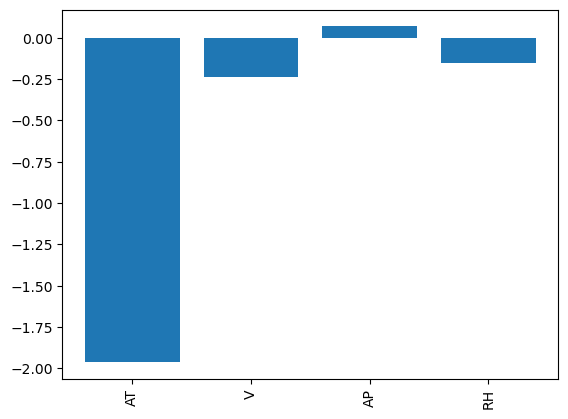

In [16]:
plt.bar(x = x_train.columns, height = lr.coef_)
plt.xticks(rotation = 90)
plt.show()

## Evaluate the model

In [17]:
r2_score(y_eval,y_pred)

0.9304112159477682

The model has a r2 score of 0.93, This implies that the regression model, which used the predicted values (y_pred) to estimate the dependent variable (y_eval), explains about 93.04% of the variance in the actual data.

## Plot the results

Text(0.5, 1.0, 'Actual vs Predicted Values')

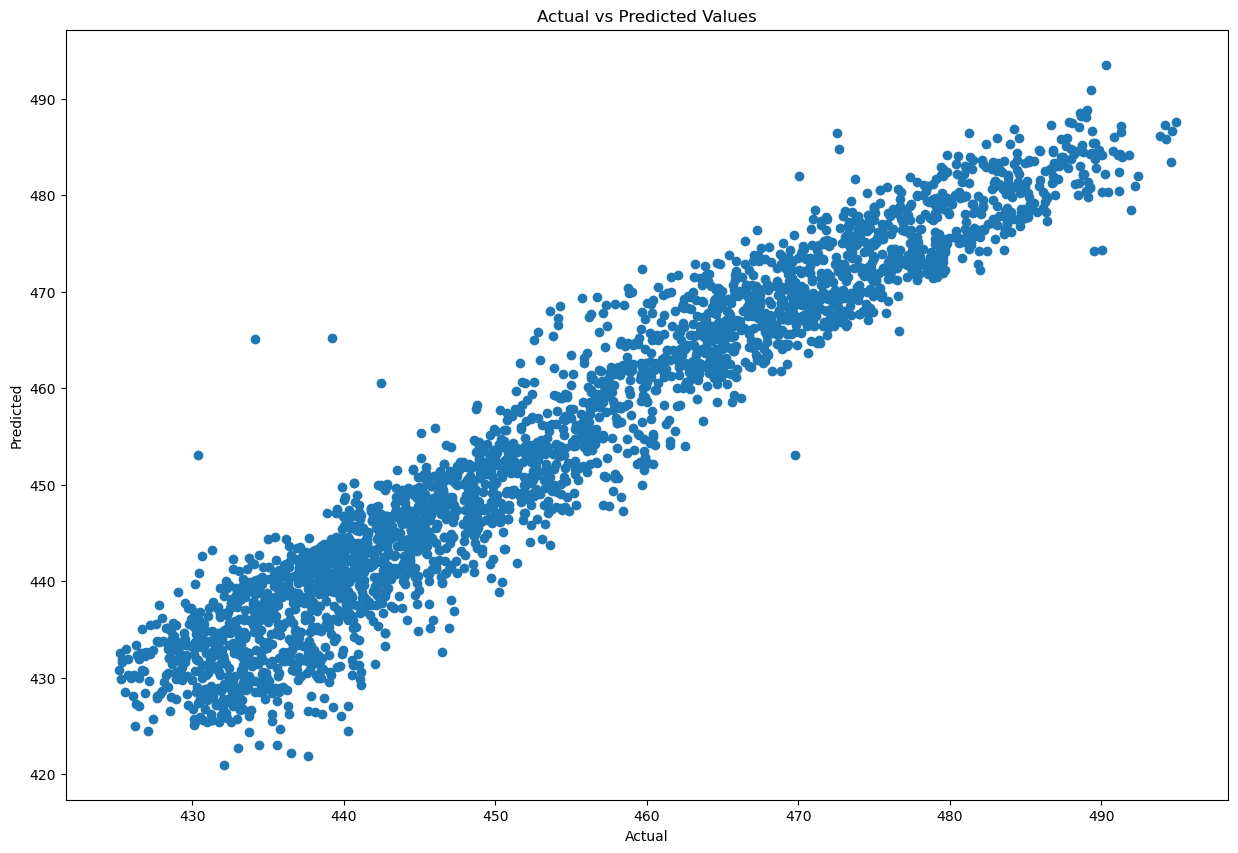

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(y_eval,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')

## Predicted Values

In [24]:
pred_val_df = pd.DataFrame({'Actual Value': y_eval, 'Predicted Value':y_pred,'Difference':y_eval-y_pred})
pred_val_df[0:10]

,Actual Value,Predicted Value,Difference
4834,431.23,431.402451,-0.172451
1768,460.01,458.614741,1.395259
2819,461.14,462.819674,-1.679674
7779,445.90,448.601237,-2.701237
7065,451.29,457.879479,-6.589479
9482,432.68,429.676856,3.003144
9,477.50,473.017115,4.482885
4986,459.68,456.532373,3.147627
6168,477.50,474.342524,3.157476
3664,444.99,446.364396,-1.374396


As the difference in Actual values and predicted values are minmum we can say that this model works good